In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

In [2]:
#多行语句打印结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#定义读取文件函数

def load_text(des):
    data = open(des, 'rU')
    ldic = []
    for line in data:
        ldic.append(line.strip().split('\t'))
    cdic = {}
    for l in ldic:
        if ':' in l[0]:
            x = l[0]
            cdic[x] = []
            ll = []
        ll.append(l)
        cdic[x] = ll
    return(cdic)

#定义提取取值含义函数

def judge_c(x,cdic):
       
    for lc in cdic.keys():
        if x in lc:
            y = lc
    return(cdic[y])

In [4]:
!pwd


/Users/didiw/Documents/study/kaggle/project/homeprice


In [5]:
#读取训练及测试集
#wd = '/mnt/d/wanghao1/My Documents/study/kaggle/project/homeprice/Data/'
wd = '/Users/didiw/Documents/study/kaggle/project/homeprice/Data/'
#定义值字典
des = wd+'data_description.txt'
cdic = load_text(des)

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [6]:
#获取训练数据
df_train=pd.read_csv(wd+'train.csv')

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#探索y变量
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

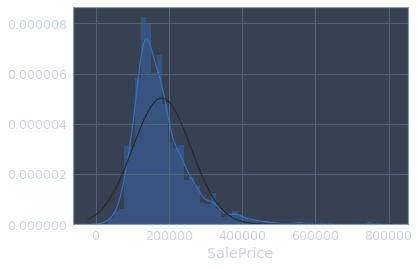

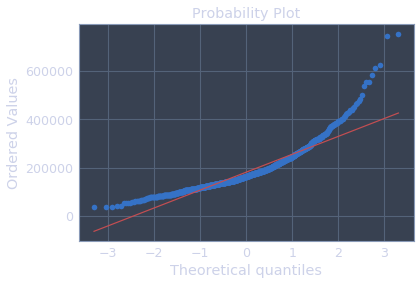

In [17]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [11]:
#偏度：
print('Skewness: %f' %df_train['SalePrice'].skew())
#峰度：正态分布下峰度值为3
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


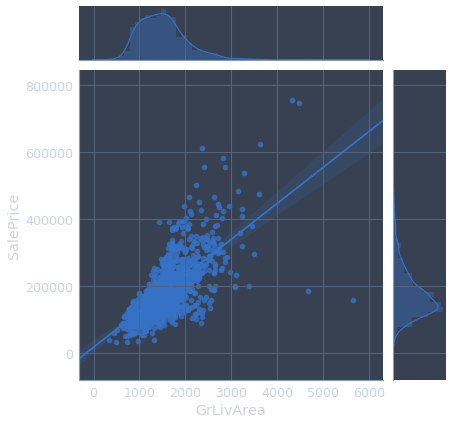

In [24]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
#plt.figure(figsize=(8,6))
g = sns.jointplot(x="GrLivArea", y="SalePrice", data=data, kind="reg")

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


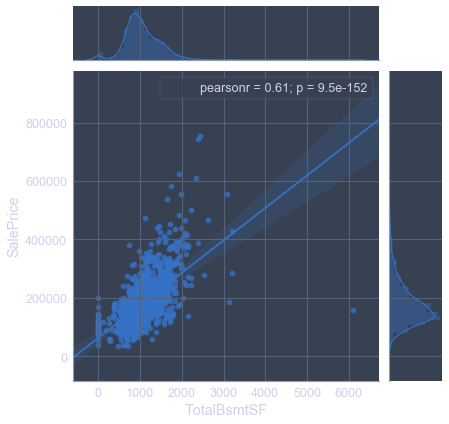

In [13]:
var = df_train['TotalBsmtSF']
data = pd.concat([df_train['SalePrice'],var],axis=1)
sns.jointplot(data=data,x='TotalBsmtSF',y='SalePrice',kind='reg')

(-0.5, 9.5, 0, 800000)

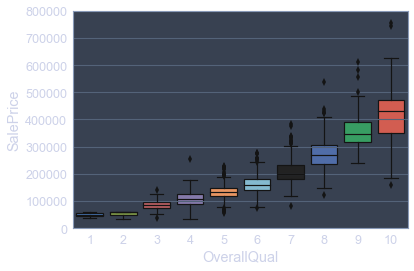

In [14]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
#f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y='SalePrice',data= data)
fig.axis(ymin=0,ymax=800000)

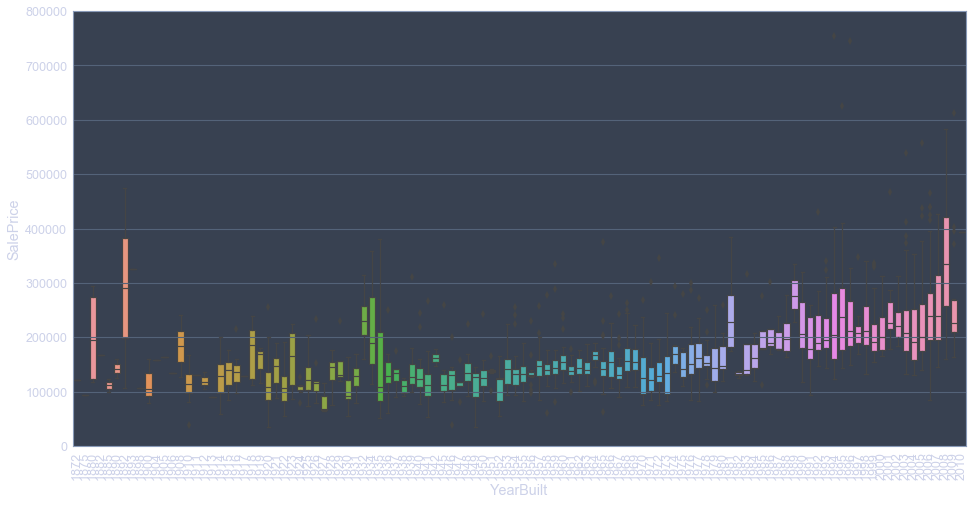

In [15]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

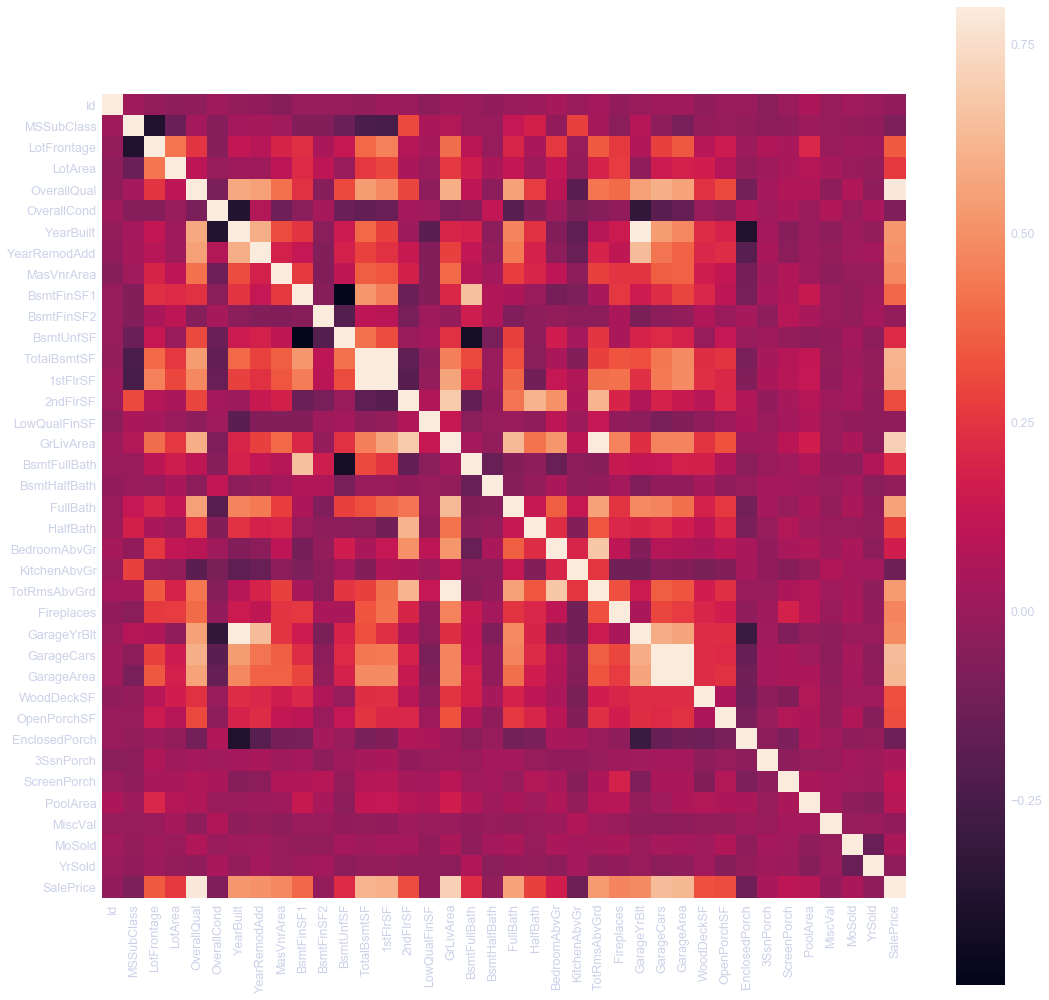

In [16]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,vmax=.8,square=True)

In [30]:
corrmat = df_train.corr()

In [32]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm =np.corrcoef(df_train[cols].values.T)

In [33]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

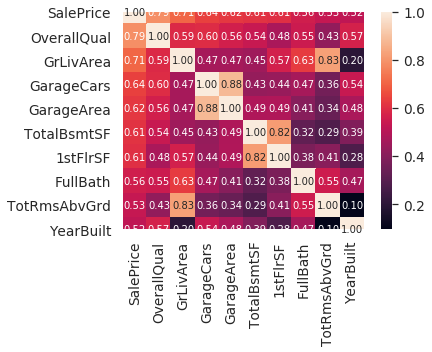

In [35]:
# saleprice correlation matix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot =True,square =True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)


In [18]:
judge_c('TotRmsAbvGrd',cdic)
judge_c('FullBath',cdic)

[['TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)']]

[['BsmtFullBath: Basement full bathrooms']]

/home/didiw/.conda/envs/py3ana/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


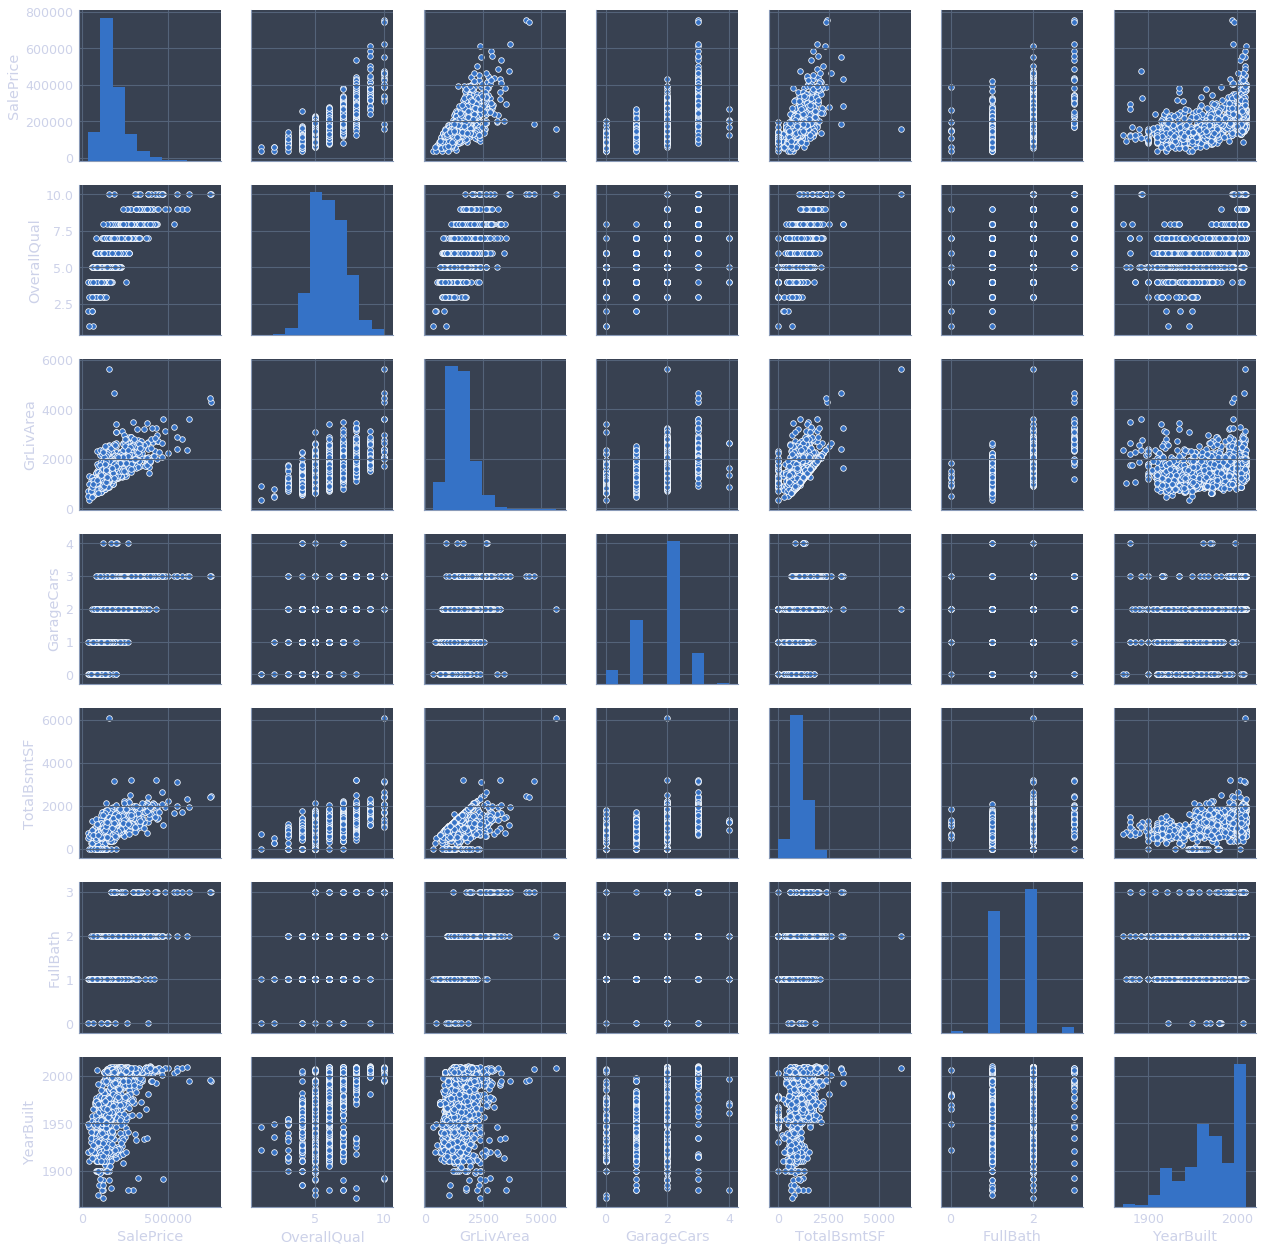

In [12]:
#scatter piont plot
#sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(data=df_train[cols],size=2.5)

In [20]:
#missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missingdata = pd.concat([total,percent],axis=1,keys=['total','percent'])
missingdata.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#dealing with missing data
df_train = df_train.drop(missingdata[missingdata['total']>1].index,1)

In [22]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [23]:
df_train.isnull().sum().max()#just checking that there's no missing data missing...

0

In [24]:
#standark###dizing data 
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of then distribution:')
print(low_range)
print('\nouter range (hige) of then distribution:')
print(high_range)


outer range (low) of then distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (hige) of then distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


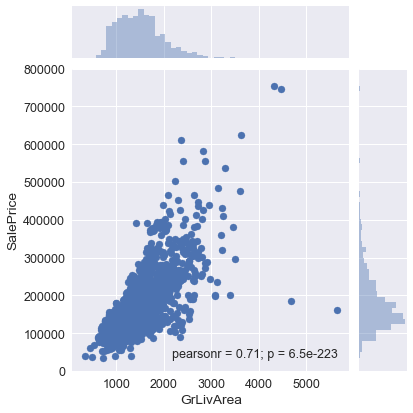

In [25]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
#data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
sns.jointplot(data=data,x=var,y='SalePrice',ylim=(0,800000))

In [26]:
#deleting points
df_train.sort_values(by = 'GrLivArea',ascending = False)[:2]
df_train  =  df_train.drop(df_train[df_train['Id'].isin([1299,524])==True].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


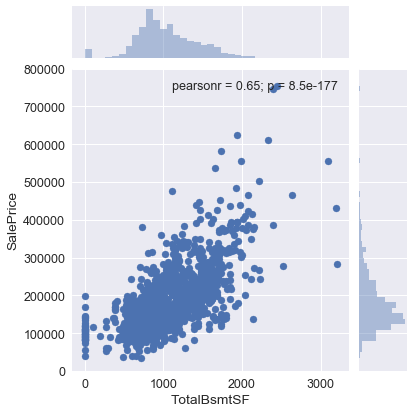

In [27]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
sns.jointplot(data=data,x=var,y='SalePrice',ylim=(0,800000))

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


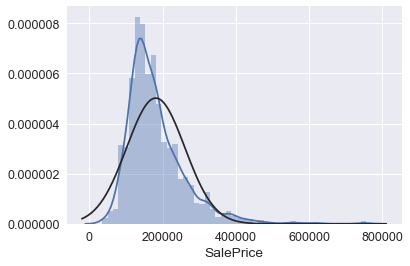

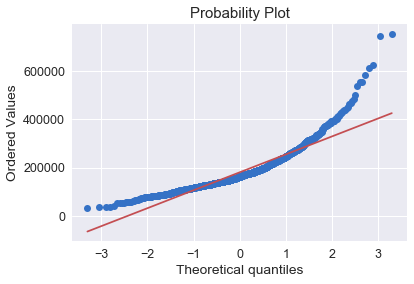

In [28]:
sns.distplot(df_train['SalePrice'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [29]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


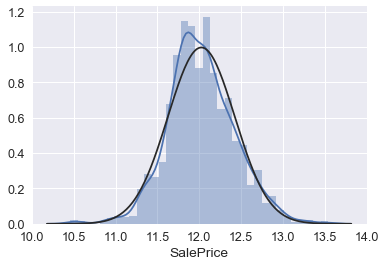

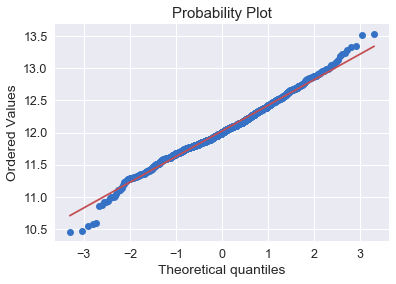

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


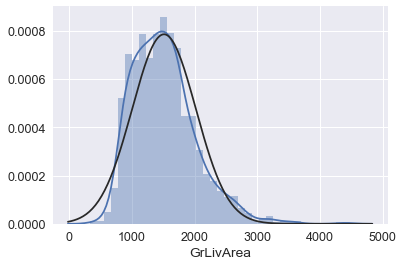

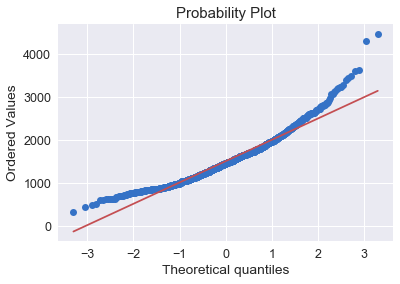

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


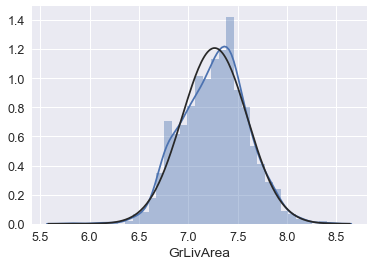

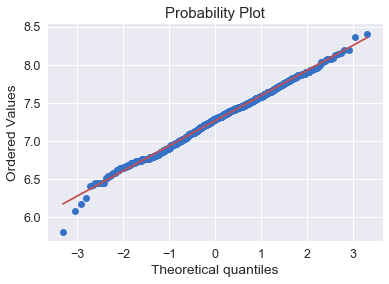

In [32]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


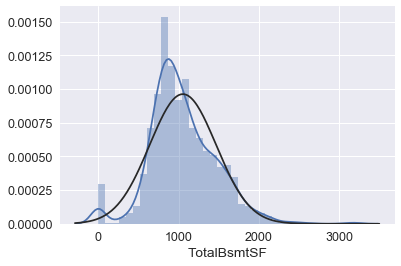

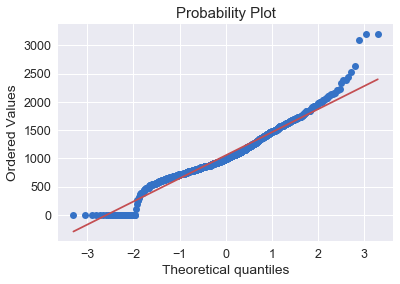

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [34]:
#histogram and normal probability plot
sns.distplot(tol, fit=norm);
fig = plt.figure()
res = stats.probplot(tol, plot=plt)

NameError: name 'tol' is not defined

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


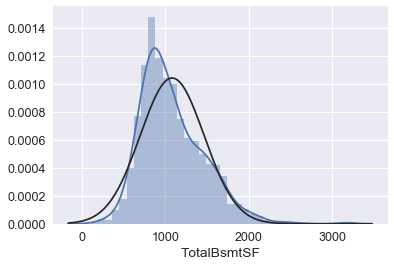

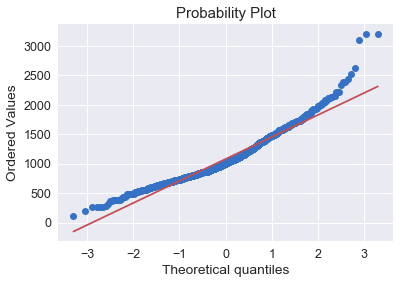

In [35]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

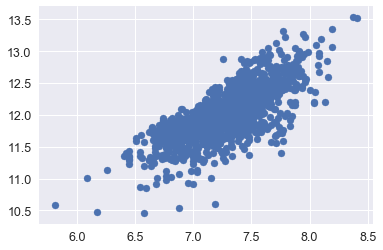

In [36]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

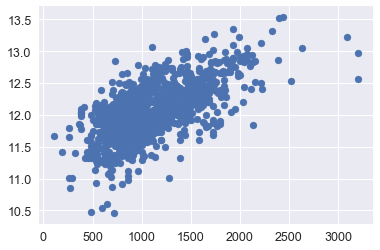

In [37]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [38]:
#get one-hot encode
df_train = pd.get_dummies(df_train)

#or
#df_train = df_train.join(pd.get_dummies(df_train.OverallCond))

In [39]:
df_train = df_train.join(pd.get_dummies(df_train.OverallCond))

In [40]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [41]:
[x**2 for x in range(10) if x%2 == 0]

[0, 4, 16, 36, 64]

In [42]:
[x for x in range(2,8)]


[2, 3, 4, 5, 6, 7]